## Tasca 6. Visualització

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
file = '../data/DelayedFlights.csv'
delayed_flights = pd.read_csv(file)

In [121]:
# importem la taula de companyies 

carrier_file = '../data/Unique_carriers.csv'
carriers = pd.read_csv(carrier_file, index_col=0).to_dict()['Description']

In [122]:
carriers

{'02Q': 'Titan Airways',
 '04Q': 'Tradewind Aviation',
 '05Q': 'Comlux Aviation, AG',
 '06Q': 'Master Top Linhas Aereas Ltd.',
 '07Q': 'Flair Airlines Ltd.',
 '09Q': 'Swift Air, LLC d/b/a Eastern Air Lines d/b/a Eastern',
 '0BQ': 'DCA',
 '0CQ': 'ACM AIR CHARTER GmbH',
 '0FQ': 'Maine Aviation Aircraft Charter, LLC',
 '0GQ': 'Inter Island Airways, d/b/a Inter Island Air',
 '0HQ': 'Polar Airlines de Mexico d/b/a Nova Air',
 '0J': 'JetClub AG',
 '0JQ': 'Vision Airlines',
 '0LQ': 'Metropix UK, LLP.',
 '0OQ': 'Open Skies',
 '0Q': 'Flying Service N.V.',
 '0QQ': 'TAG Aviation (UK) Ltd.',
 '0RQ': 'TAG Aviation Espana S.L.',
 '0TQ': 'Corporatejets, XXI',
 '0UQ': 'Comlux Malta, Ltd.',
 '0VQ': 'Ocean Sky (UK) Limited',
 '0WQ': 'Avjet Corporation',
 '0YQ': 'Comlux Malta Ltd.',
 '10Q': 'Swiss Air Ambulance',
 '12Q': 'Unijet',
 '13Q': 'Chartright Air Inc.',
 '14Q': 'London Air Services Limited',
 '15Q': 'Air Alsie A/S',
 '17Q': 'Albinati Aeronautics SA',
 '1AQ': 'Via Airlines d/b/a Charter Air Transp

In [4]:
delayed_flights.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [5]:
delayed_flights['Unnamed: 0'].value_counts().unique()

array([1])

### Exercici 1
Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

- [ ] Una variable categòrica (UniqueCarrier)  

In [97]:
group = delayed_flights.groupby('UniqueCarrier').agg({'ArrDelay':['count','sum','mean'],'DepDelay':['sum','mean']})
# renombrem les columnes
group.columns = ['_'.join(col).strip('_') for col in group.columns.values]
# group.droplevel(0, axis=1)
group.reset_index(inplace=True)

<AxesSubplot:xlabel='UniqueCarrier', ylabel='delay_min_flights'>

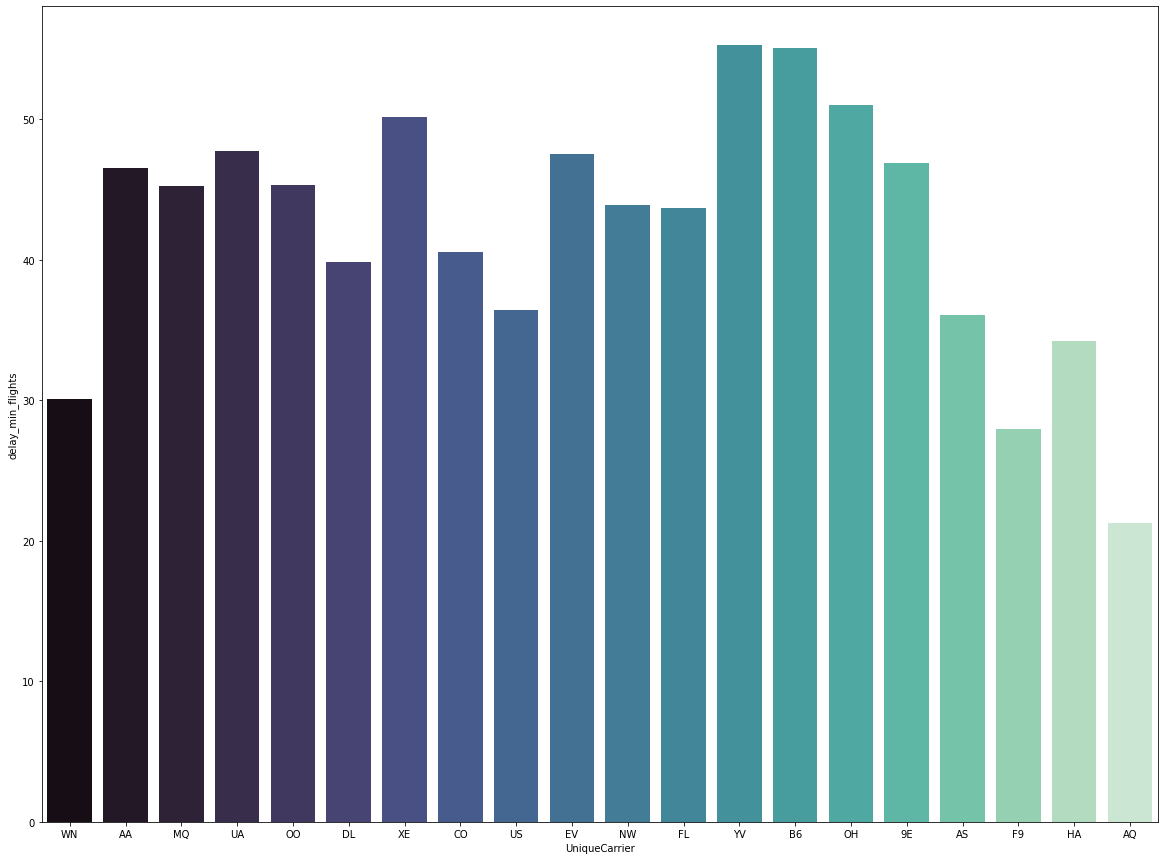

In [40]:
plt.figure(figsize=(20,15))
sns.barplot(data=group.reset_index().sort_values([('ArrDelay','count')], ascending=False),
            x='UniqueCarrier', y='delay_min_flights',
            palette='mako')

<AxesSubplot:xlabel='ArrDelay_count', ylabel='delay_min_flights_'>

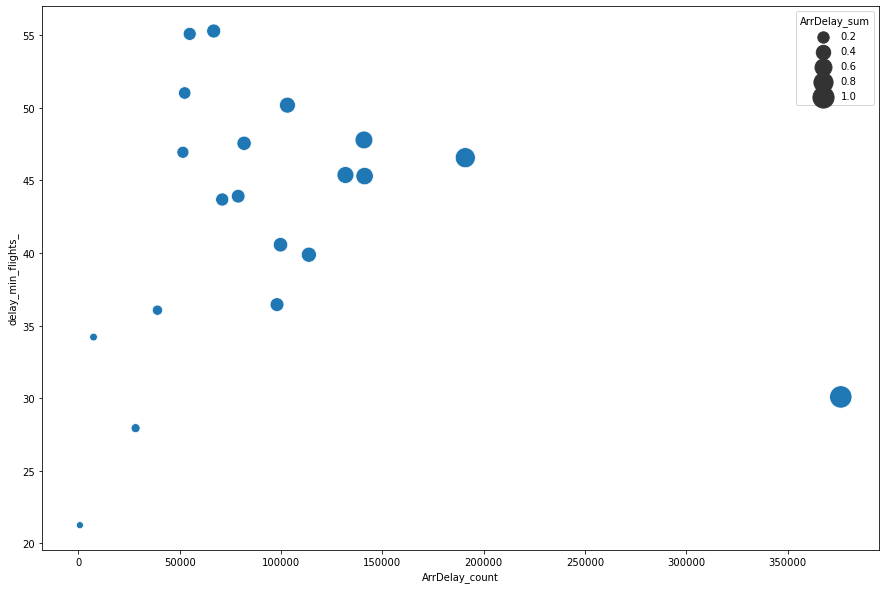

In [76]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=group.reset_index(), x='ArrDelay_count', y='delay_min_flights_', size='ArrDelay_sum', sizes=(50,500))

- [ ] Una variable numèrica (ArrDelay)  

/Users/xavier/opt/anaconda3/envs/udacity_dsnd/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

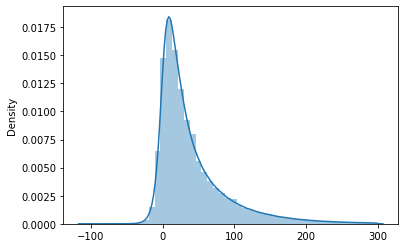

In [143]:
sns.distplot(x=delayed_flights[delayed_flights.ArrDelay<300].ArrDelay)

<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay'>

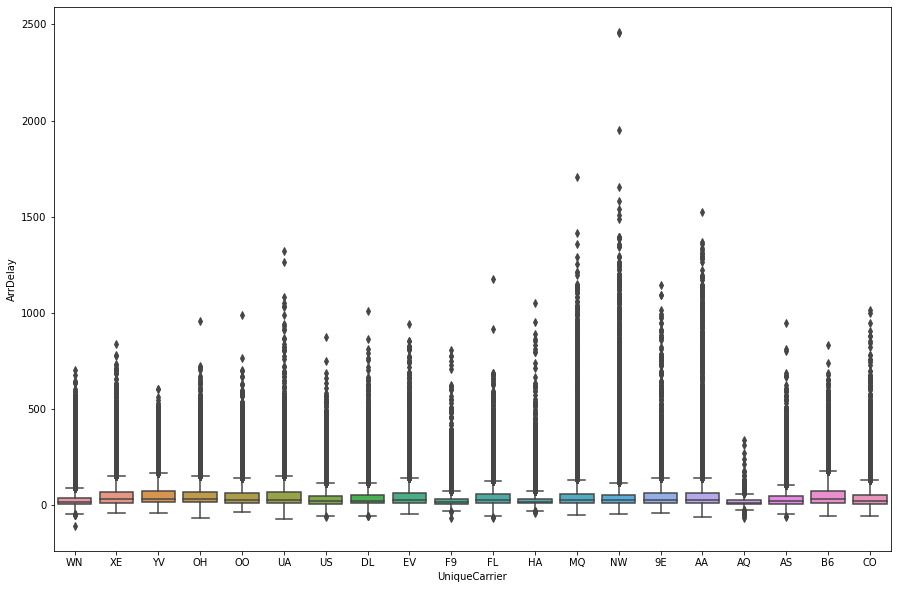

In [79]:
plt.figure(figsize=(15,10))
sns.boxplot(data=delayed_flights, x='UniqueCarrier', y='ArrDelay')

<AxesSubplot:xlabel='UniqueCarrier', ylabel='ArrDelay'>

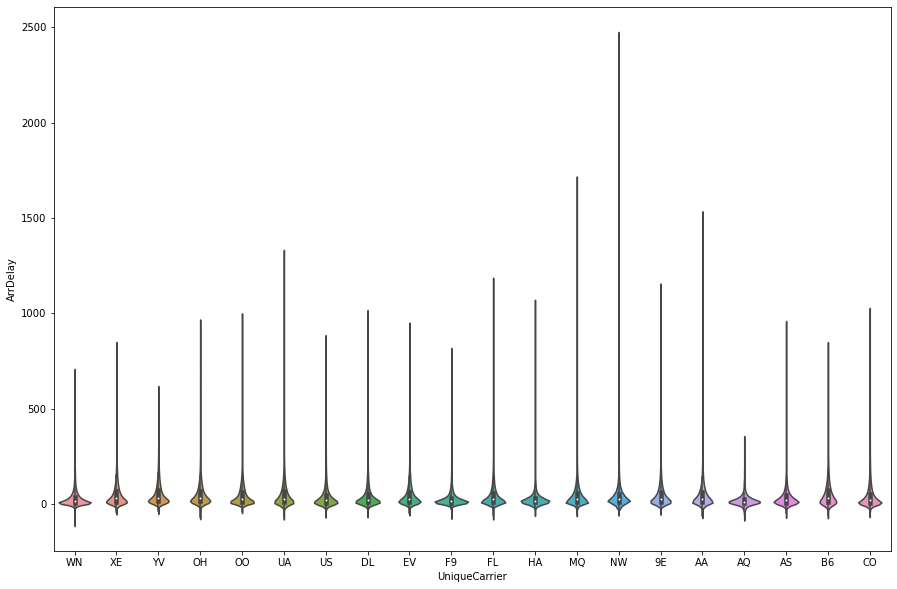

In [80]:
plt.figure(figsize=(15,10))
sns.violinplot(data=delayed_flights, x='UniqueCarrier', y='ArrDelay')

- [ ] Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)  

In [ ]:
sns.boxplot(data=delayed_flights, x=['carrier_name'], y='ArrDelay')

- [ ] Dues variables numèriques (ArrDelay i DepDelay)  

- [ ] Tres variables (ArrDelay, DepDelay i UniqueCarrier)  

- [ ] Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).  

In [132]:
group['carrier_name'] = group.UniqueCarrier.map(carriers)


In [134]:
group.head()

,UniqueCarrier,ArrDelay_count,ArrDelay_sum,ArrDelay_mean,DepDelay_sum,DepDelay_mean,carrier_name
0,9E,51569,2420468.0,46.936493,2457810.0,47.370338,Endeavor Air Inc.
1,AA,190910,8889066.0,46.561553,8918260.0,46.481953,American Airlines Inc.
2,AQ,744,15814.0,21.255376,20010.0,26.680000,Aloha Airlines Inc.
3,AS,39010,1406735.0,36.060882,1504939.0,38.300435,Alaska Airlines Inc.
4,B6,54925,3025749.0,55.088739,3044016.0,55.030570,JetBlue Airways


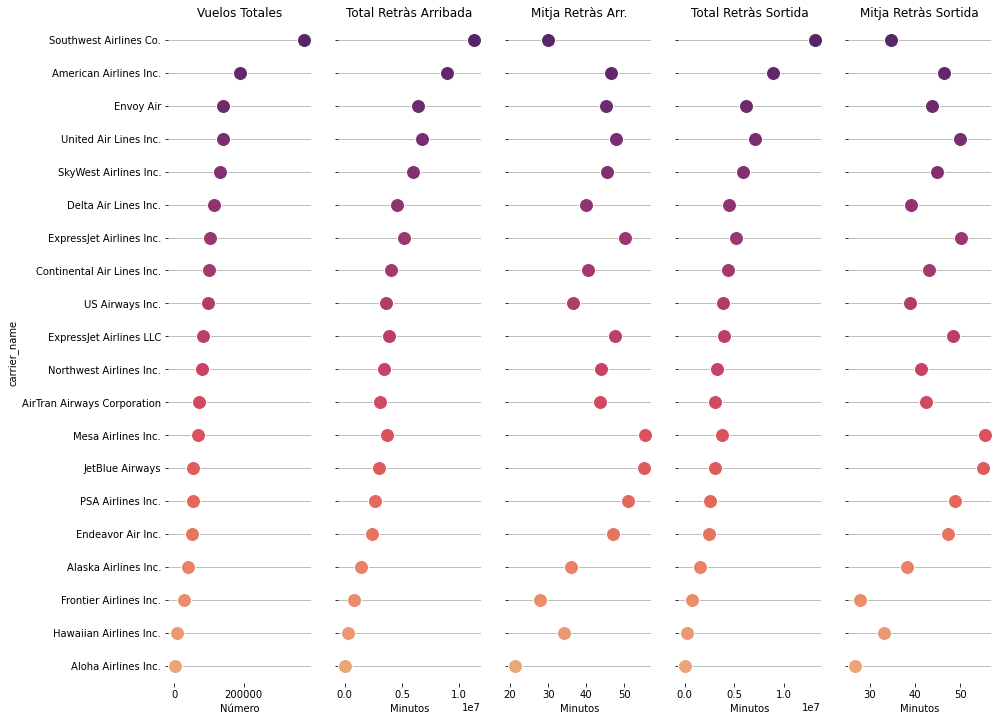

In [136]:
g = sns.PairGrid(group.sort_values('ArrDelay_count',ascending=False),
            x_vars=group.columns[-6:-1], y_vars=['carrier_name'],
            height=10, aspect=.25)

g.map(sns.stripplot, size=14, orient='h', jitter=False, palette='flare_r', linewidth=1, edgecolor='w')

# g.set(xlim=(0,25), xlabel='Minutes', ylabel='')
titles = ['Vuelos Totales','Total Retràs Arribada','Mitja Retràs Arr.','Total Retràs Sortida','Mitja Retràs Sortida']
etiquetasx = ['Número'] + ['Minutos']*4
for ax, title, etiqx in zip(g.axes.flat, titles, etiquetasx):
    ax.set(title = title)
    ax.set(xlabel=etiqx)
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    
sns.despine(left=True, bottom=True)

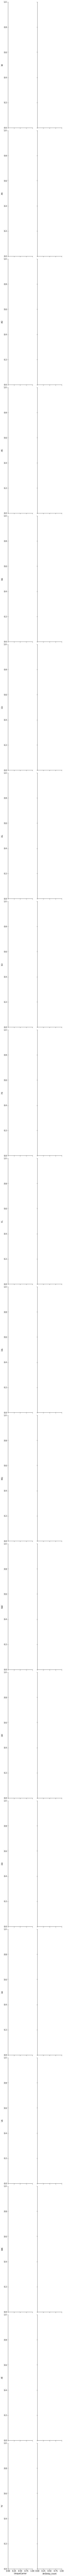

In [96]:
 sns.PairGrid(group.reset_index().sort_values('ArrDelay_count',ascending=False),
            x_vars=group.reset_index().columns[:-4], y_vars=group.reset_index()['UniqueCarrier'],
            height=10, aspect=.25)

<AxesSubplot:xlabel='ArrDelay', ylabel='Density'>

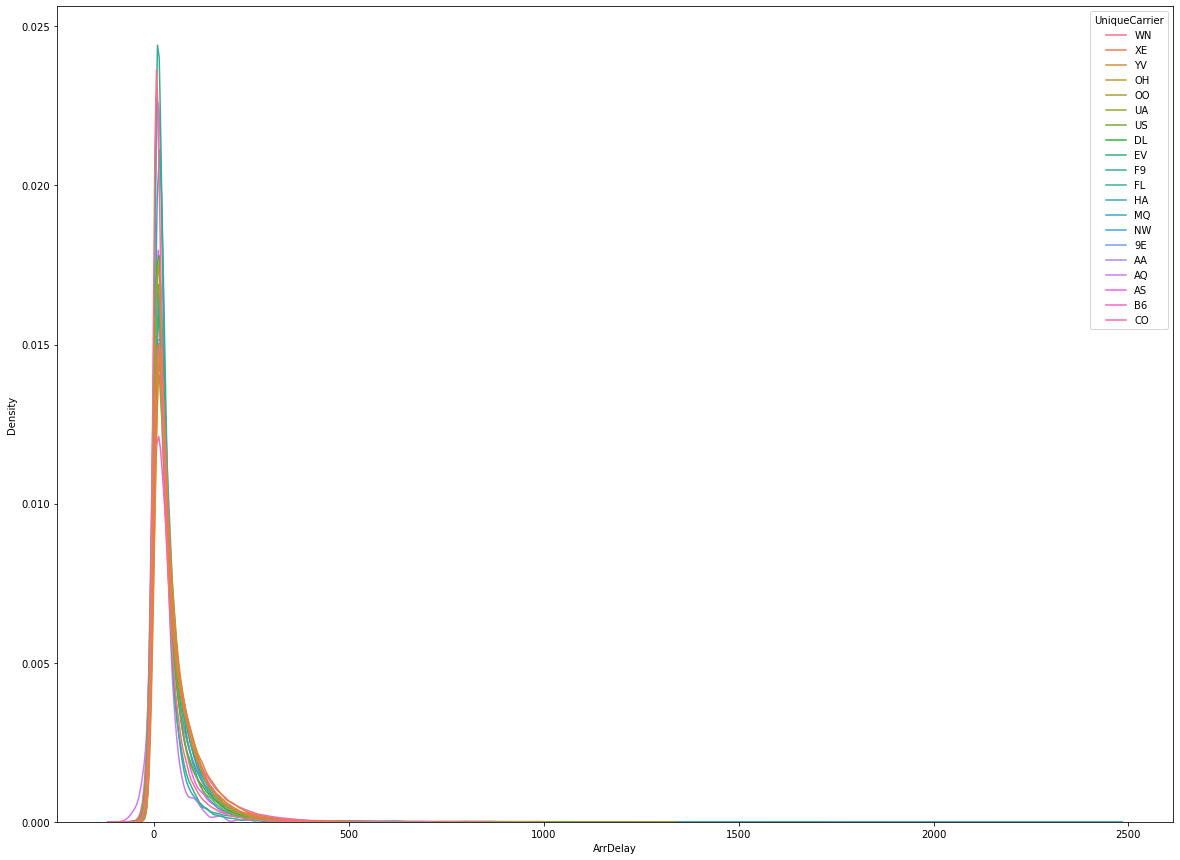

In [12]:
plt.figure(figsize=(20,15))
sns.kdeplot(x=delayed_flights.ArrDelay, hue=delayed_flights.UniqueCarrier, common_norm=False)

### Exercici 2
Exporta els gràfics com imatges o com html.

### Exercici 3
Exporta el data set net i amb les noves columnes a Excel.

### Exercici 4
Integra les visualitzacions gràfiques, en la tasca 5, del Sprint 3.